In [1]:
import xarray
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
xda=xarray.open_dataset('ROSE_2degstd.nc',engine='h5netcdf') # engines can be any of'netcdf4', ‘scipy’, ‘pydap’, ‘h5netcdf’, ‘pynio’

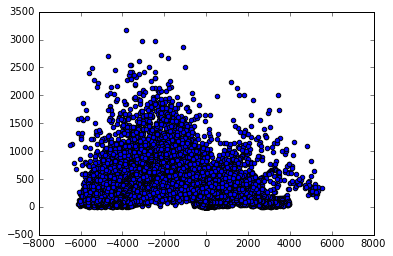

In [4]:
plt.scatter(xda.ROSE,xda.ROSEstd)

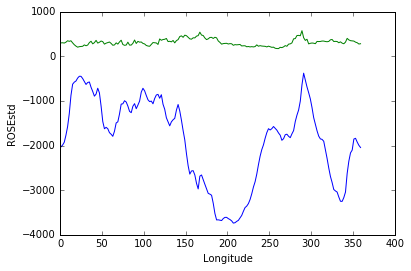

In [5]:
xda.ROSE.mean(dim='Latitude').plot.line()
xda.ROSEstd.mean(dim='Latitude').plot.line()

In [6]:
lons,lats=np.meshgrid(xda.Longitude.Longitude.values,xda.Latitude.Latitude.values)

In [7]:
# now start an IDV from here using drillsdown plugin or offline from terminal it doesnt matter
# if starting offline check if http://127.0.0.1:8788/ping should say 'ok'; meaning we can communicate with IDV 
#127.0.0.1 might have to be replaced by localhost

In [8]:
%load_ext drilsdown
%loadBundle DEM_std.xidv 
#if bundle loads successfully it is a good check that we are able to communicate to IDV through default 8788 port

Starting IDV: /home/suvarchal/IDV_5.3u1/runIDV
Waiting on the IDV
Waiting on the IDV
Waiting on the IDV
Waiting on the IDV
IDV started
bundle loaded


In [9]:
from bokeh.plotting import output_notebook
from bokeh.resources import INLINE
from bokeh.models import ColumnDataSource, OpenURL, TapTool
from bokeh.plotting import figure, output_file, show

In [10]:
from bokeh.resources import INLINE
output_notebook(resources=INLINE,hide_banner=True)


p = figure(plot_width=800, plot_height=800,
           tools=["tap","box_zoom","save"], title="DEM Mean vs std")
#many more tools are possible

p.xaxis.axis_label = "Mean of Elevation"
p.yaxis.axis_label = "Standard Deviation of Elevation"


source = ColumnDataSource(data=dict(
    mean=xda.ROSE.values.ravel(),
    std=xda.ROSEstd.values.ravel(),
    lat=lats.ravel(),lon=lons.ravel())) #names here dont mean much except for what is passed to function below


p.circle('mean', 'std', size=4, source=source)
p.toolbar.logo=None
 
url='http://127.0.0.1:8788/loadisl?isl=<isl><bundle file="DEM_std.xidv"/><center lat="@lat" lon="@lon" /><reload /></isl>'
#in above line 127.0.0.1 may be replaced by localhost
#8788 is default port IDV has a server running
#communicating to IDV by this way only works for IDV > 5.3


taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)
show(p) # depending on what backend was selected this opens either a new html page or inline here 

In [11]:
#select a point on above plot and make image below

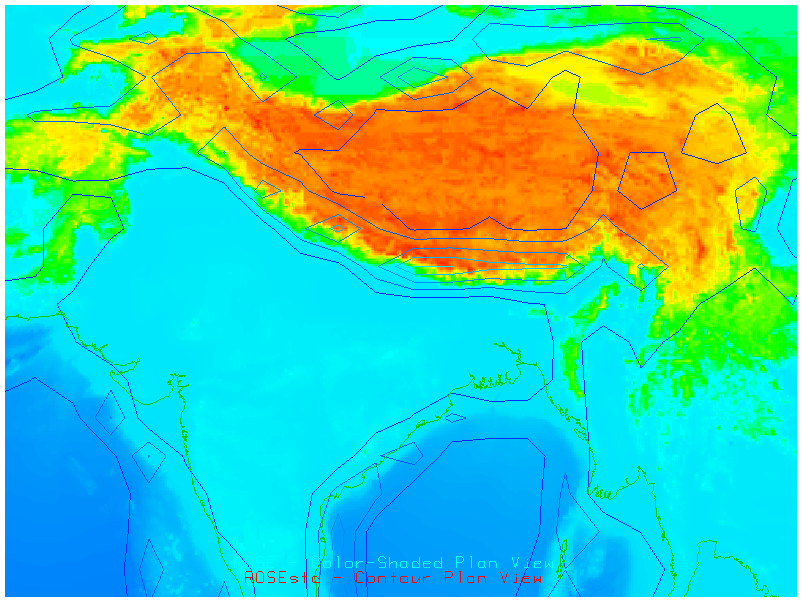

In [12]:
%makeImage